# Support Vector Machine (SVM)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
#Allocating the feature to X and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[    58 101000]
 [    42  54000]
 [    53 104000]
 [    59  76000]
 [    41  72000]
 [    54  70000]
 [    28 123000]
 [    21  16000]
 [    35  27000]
 [    46  96000]
 [    33  28000]
 [    52 150000]
 [    26  72000]
 [    45  22000]
 [    34  72000]
 [    41  72000]
 [    47  51000]
 [    59  29000]
 [    36 118000]
 [    29  43000]
 [    22  27000]
 [    35  72000]
 [    49  39000]
 [    60  34000]
 [    49  28000]
 [    39  73000]
 [    20  82000]
 [    51  23000]
 [    39  79000]
 [    35  88000]
 [    46  22000]
 [    47  50000]
 [    37  71000]
 [    35  91000]
 [    36  50000]
 [    37  72000]
 [    44 139000]
 [    56  60000]
 [    60  42000]
 [    58  23000]
 [    20  82000]
 [    38 113000]
 [    53  82000]
 [    33  60000]
 [    46  79000]
 [    35 108000]
 [    36  60000]
 [    31  68000]
 [    42 149000]
 [    47  30000]
 [    39  71000]
 [    28  59000]
 [    24  23000]
 [    41  87000]
 [    55 125000]
 [    41  71000]
 [    39  42000]
 [    42  75000]
 [    35  5500

In [ ]:
print(y_train)

[1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1
 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 0]


In [ ]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [ ]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


# Validation Set

In [ ]:
#  A validation data set is a data-set of examples used to tune the hyperparameters (i.e. the architecture) of a classifier. 

# In machine learning, a hyperparameter is a parameter whose value is used to control the
# learning process.
 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
X_val

array([[    54, 104000],
       [    46,  28000],
       [    43, 133000],
       [    30, 135000],
       [    53, 143000],
       [    39,  59000],
       [    58,  95000],
       [    47,  23000],
       [    47,  20000],
       [    39, 106000],
       [    28,  37000],
       [    20,  74000],
       [    26, 118000],
       [    26,  80000],
       [    27,  17000],
       [    52, 138000],
       [    35,  50000],
       [    39,  61000],
       [    33,  31000],
       [    29, 148000],
       [    48, 134000],
       [    23,  82000],
       [    35,  38000],
       [    42,  73000],
       [    47, 113000],
       [    46,  82000],
       [    36,  52000],
       [    18,  44000],
       [    34,  43000],
       [    33,  51000],
       [    28,  32000],
       [    39, 134000],
       [    58,  47000],
       [    46, 117000],
       [    36,  75000],
       [    43, 129000],
       [    40,  78000],
       [    51, 134000],
       [    35,  60000],
       [    29,  61000],


In [ ]:
y_val

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0])

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 1.97189373  0.99483044]
 [ 0.39996782 -0.40769348]
 [ 1.48066688  1.08435324]
 [ 2.0701391   0.24880708]
 [ 0.30172245  0.12944334]
 [ 1.57891225  0.06976147]
 [-0.97546736  1.65133099]
 [-1.66318494 -1.54164898]
 [-0.28774977 -1.2133987 ]
 [ 0.79294929  0.84562577]
 [-0.48424051 -1.18355777]
 [ 1.38242151  2.45703622]
 [-1.1719581   0.12944334]
 [ 0.69470392 -1.36260338]
 [-0.38599514  0.12944334]
 [ 0.30172245  0.12944334]
 [ 0.89119466 -0.49721628]
 [ 2.0701391  -1.15371684]
 [-0.1895044   1.50212632]
 [-0.87722199 -0.73594375]
 [-1.56493957 -1.2133987 ]
 [-0.28774977  0.12944334]
 [ 1.0876854  -0.85530749]
 [ 2.16838447 -1.00451216]
 [ 1.0876854  -1.18355777]
 [ 0.10523171  0.15928428]
 [-1.76143031  0.42785269]
 [ 1.28417614 -1.33276244]
 [ 0.10523171  0.33832988]
 [-0.28774977  0.60689829]
 [ 0.79294929 -1.36260338]
 [ 0.89119466 -0.52705721]
 [-0.09125903  0.09960241]
 [-0.28774977  0.69642109]
 [-0.1895044  -0.52705721]
 [-0.09125903  0.12944334]
 [ 0.59645855  2.12878594]
 

In [ ]:
print(X_test)

[[-0.77897662  0.57705736]
 [ 0.00698634 -0.52705721]
 [-0.28774977  0.21896615]
 [-0.77897662  0.33832988]
 [-0.28774977 -0.52705721]
 [-1.07371273 -1.42228524]
 [-0.68073125 -1.57148992]
 [-0.1895044   2.27799062]
 [-1.95792105  0.0100796 ]
 [ 0.89119466 -0.73594375]
 [-0.77897662 -0.55689815]
 [-0.97546736 -0.37785254]
 [-0.09125903 -0.37785254]
 [ 0.10523171  0.27864801]
 [-1.76143031  0.54721642]
 [-0.58248588  1.47228539]
 [-0.09125903  0.27864801]
 [-1.85967568  0.51737549]
 [ 1.67715762  1.86021754]
 [-0.28774977 -1.36260338]
 [-0.28774977 -0.61658002]
 [ 0.89119466  2.27799062]
 [ 0.30172245 -0.49721628]
 [ 0.89119466  1.11419418]
 [-1.4666942  -1.18355777]
 [ 1.0876854   2.18846781]
 [-0.97546736  0.57705736]
 [-0.87722199  0.36817082]
 [-0.09125903 -0.168966  ]
 [-0.58248588  0.54721642]
 [-1.66318494  0.60689829]
 [-0.09125903  0.33832988]
 [ 1.87364836 -0.22864787]
 [-0.09125903 -0.43753441]
 [-1.36844884 -0.28832974]
 [-1.95792105 -0.46737535]
 [-1.56493957  0.39801175]
 

## Training the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
# for linear kernal svm use kernal='linear'
classifier = SVC(kernel = 'linear', random_state = 0)
#Linear Kernel is used when the data is Linearly separable,
#that is, it can be separated using a single Line
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting a new result

In [ ]:
# Predic	Age= 30	, EstimatedSalary=87000
print(classifier.predict(sc.transform([[30,87000]])))  

[0]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


## Making the Confusion Matrix

In [ ]:
# Compute confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

# TP FP
# FN TN

# True Positive (TP) Actual value postive predicted postive.

# False Positive (FP) Actual value negative predicted postive.

# False Negative (FN) actual value positive and predicted negative.

# True Negative (TN) actual value negative and predicted negative.

[[66  2]
 [ 9 23]]


0.89

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


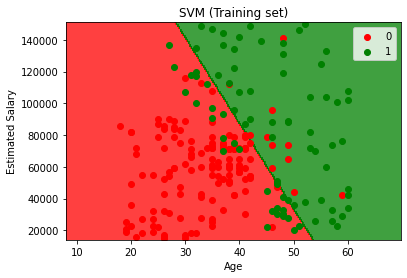

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#RED Dots Represents The customer not to buy SUV

#GREEN Dots Represents The customer  to buy SUV


## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


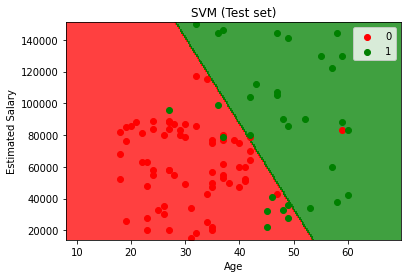

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#RED Dots Represents The customer not to buy SUV

#GREEN Dots Represents The customer  to buy SUV